<a href="https://colab.research.google.com/github/earter/Python-class/blob/master/exercises6_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
ec = pd.read_csv('L06_Ecommerce_Customers.csv')
ec.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [0]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [0]:
ec.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [0]:
type(ec)

pandas.core.frame.DataFrame

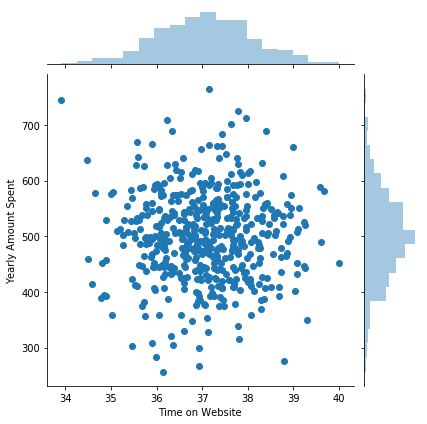

In [0]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=ec)

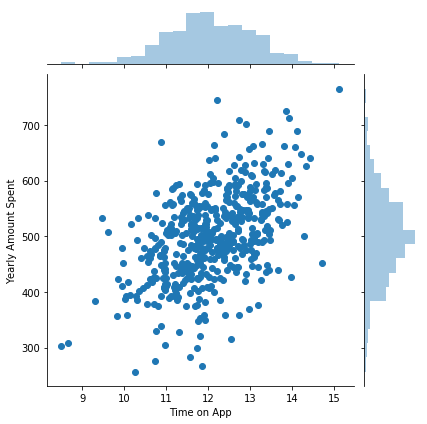

In [0]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=ec)

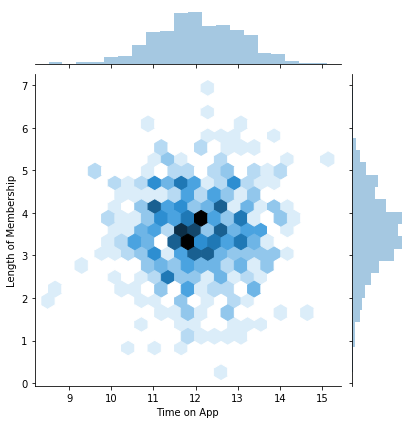

In [0]:
sns.jointplot(x='Time on App', y='Length of Membership', data=ec, kind='hex')

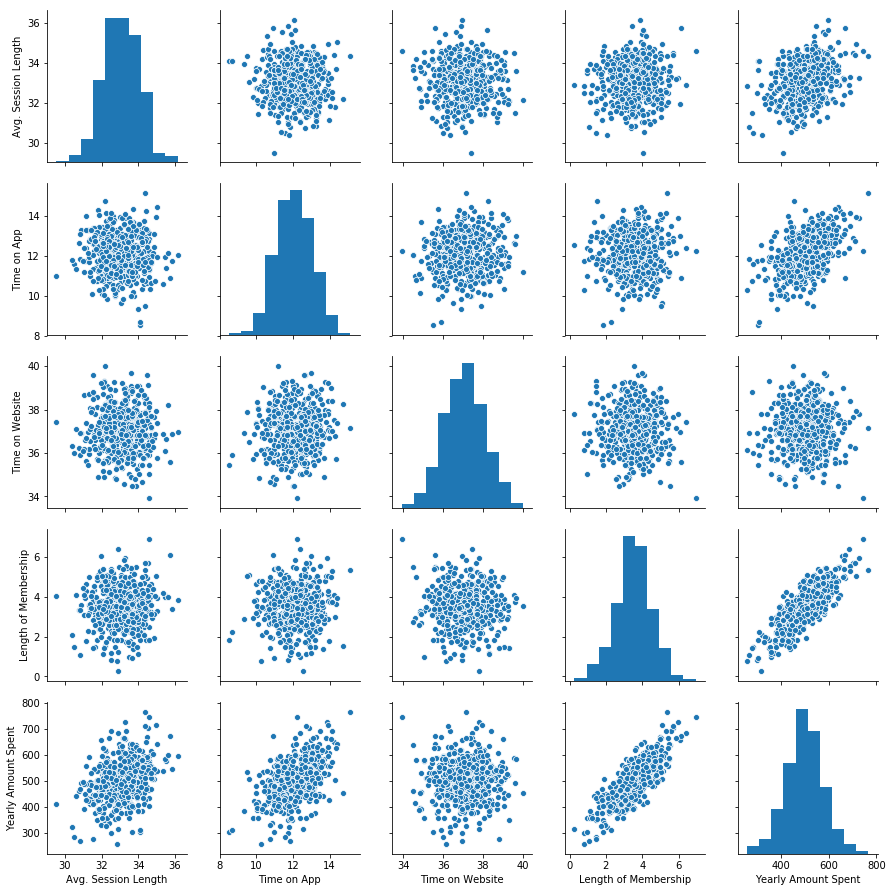

In [0]:
sns.pairplot(ec)

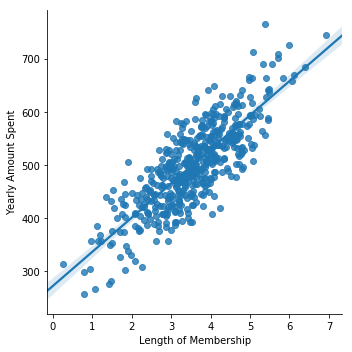

In [0]:
# Create a linear model plot (using seaborn’s lmplot) of Yearly Amount Spent vs. Length of Membership.

sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=ec)

In [0]:
# Training and Testing Data

X = ec[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = ec['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [0]:
# Training Model

lm = LinearRegression()
lm.fit(X_train, y_train)
lm.coef_  #model's coefficients, each refers to a column in X

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

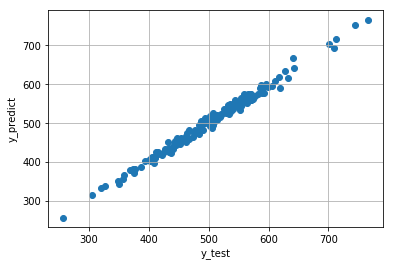

In [0]:
# Predict Test Data

y_predict = lm.predict(X_test)

"""
fig, axes = plt.subplots()
axes.scatter(y_test, y_predict)
axes.set_xlabel("y_test")
axes.set_ylabel("y_predict")
axes.grid()
"""

plt.scatter(y_test, y_predict)
plt.xlabel("y_test")
plt.ylabel("y_predict")
plt.grid()

In [0]:
# Model evaluation

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

print('r2 score:', metrics.r2_score(y_test, y_predict))

MAE: 7.2281486534308295
MSE: 79.8130516509743
RMSE: 8.933815066978626
r2 score: 0.9890046246741234


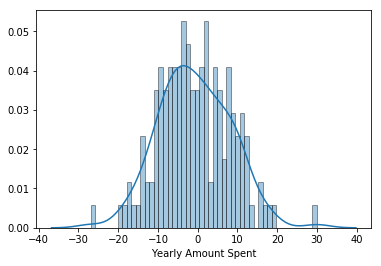

In [0]:
# histogram of residuals
sns.distplot(y_test - y_predict, bins=50, hist_kws={'edgecolor': 'black'})

In [0]:
# conclusion

print(f"intercept: {lm.intercept_}")
coef_df = pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coefficient'])
coef_df

intercept: -1047.932782250239


,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


conclusion:  
Length of membership is the one with significantly biggest linear coefficient, so it's the most crucial aspect when it comes to spendings. When it comes to time spent, app seems to be more profitable